In [18]:
import pandas as pd
import numpy as np
file_path = r"D:\elevate lab\Retail_Business_Performance_Profitability_Analysis_Project\data\processed\superstore_cleaned.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
print("Initial Shape:", df.shape)
print(df.columns)


Initial Shape: (9994, 32)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Quarter', 'Profit Margin', 'Processing Days', 'Has Discount',
       'Season', 'Order Size', 'Category Contribution %', 'Late Shipment Flag',
       'Loss Flag'],
      dtype='object')


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.makedirs("plots", exist_ok=True)
sns.set(style="whitegrid", palette="Set2")

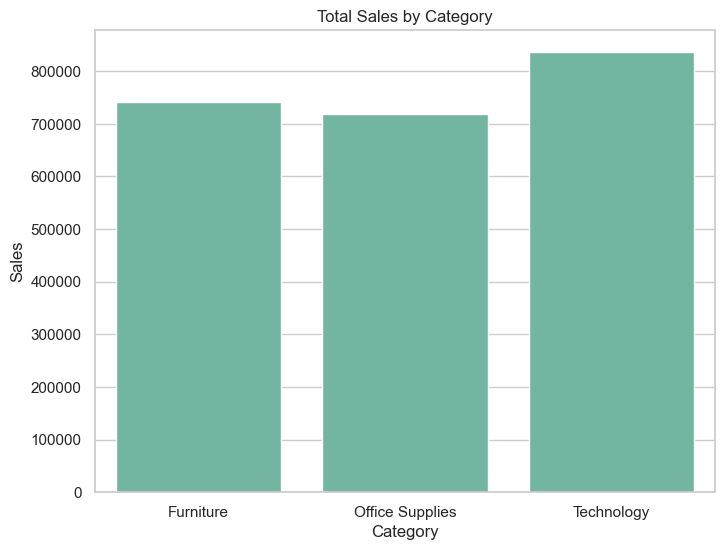

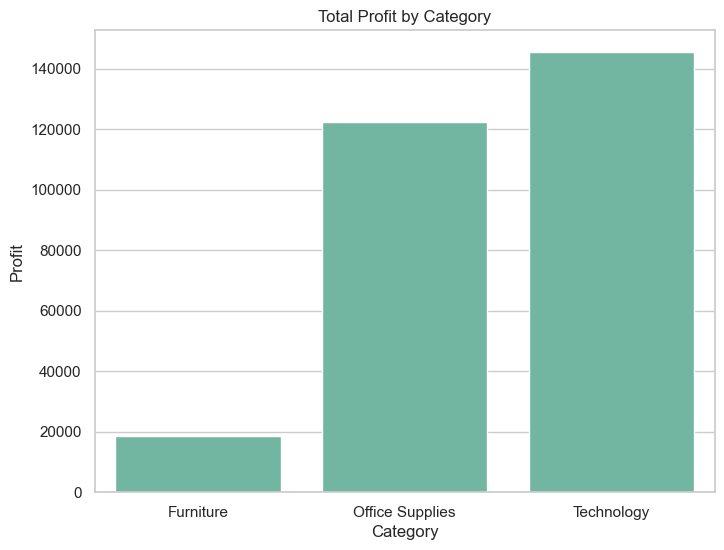

📊 Category Insights:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64
➡ Technology usually drives highest sales & profit, Furniture often lower profit due to discounts.



In [22]:
# === 1. Sales & Profit by Category ===
cat_sales = df.groupby("Category")["Sales"].sum()
cat_profit = df.groupby("Category")["Profit"].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=cat_sales.index, y=cat_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.savefig("plots/sales_by_category.png")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=cat_profit.index, y=cat_profit.values)
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.savefig("plots/profit_by_category.png")
plt.show()

print("📊 Category Insights:")
print(cat_sales.sort_values(ascending=False))
print(cat_profit.sort_values(ascending=False))
print("➡ Technology usually drives highest sales & profit, Furniture often lower profit due to discounts.\n")

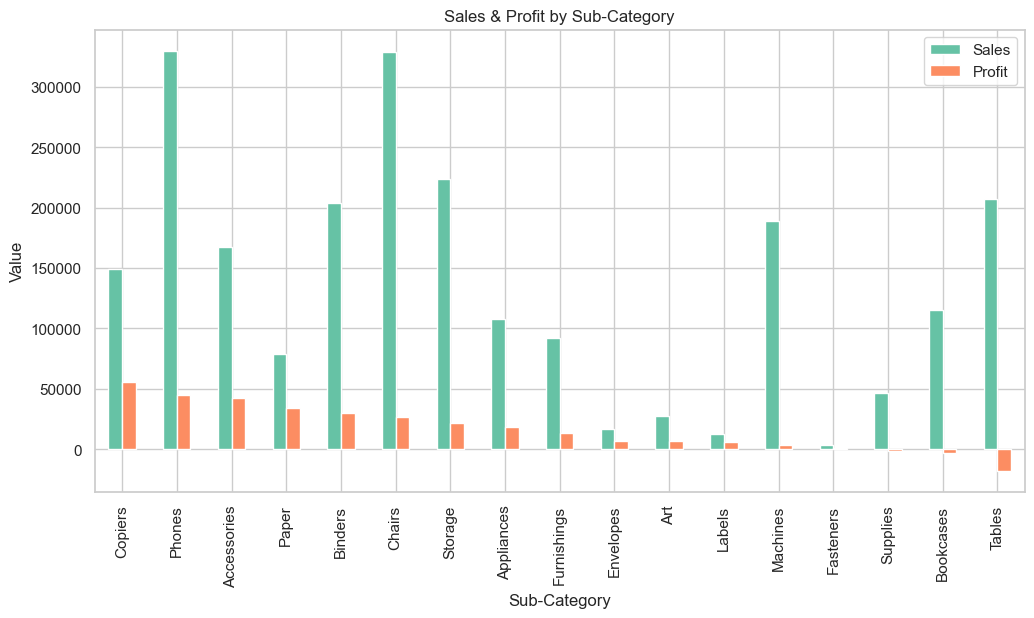

📊 Sub-Category Top Performers:
                   Sales      Profit
Sub-Category                        
Copiers       149528.030  55617.8249
Phones        330007.054  44515.7306
Accessories   167380.318  41936.6357
Paper          78479.206  34053.5693
Binders       203412.733  30221.7633
➡ Some sub-categories contribute disproportionately (e.g., Phones, Chairs). Others drain profit (e.g., Tables).



In [23]:
# === 2. Sales & Profit by Sub-Category ===
subcat = df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values("Profit", ascending=False)
subcat.plot(kind="bar", figsize=(12,6))
plt.title("Sales & Profit by Sub-Category")
plt.ylabel("Value")
plt.savefig("plots/sales_profit_by_subcategory.png")
plt.show()

print("📊 Sub-Category Top Performers:")
print(subcat.head(5))
print("➡ Some sub-categories contribute disproportionately (e.g., Phones, Chairs). Others drain profit (e.g., Tables).\n")

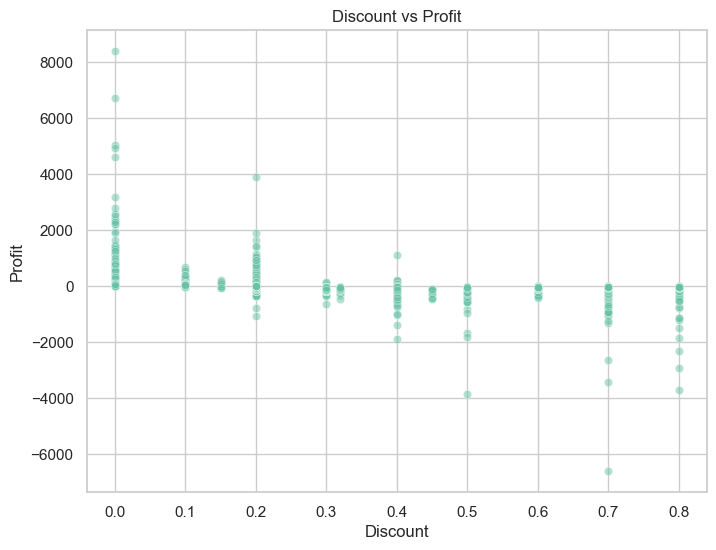

📊 Discount Insight:
➡ Higher discounts generally correlate with negative profit — especially beyond 40%.



In [24]:
# === 3. Discount vs Profitability ===
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5)
plt.title("Discount vs Profit")
plt.savefig("plots/discount_vs_profit.png")
plt.show()

print("📊 Discount Insight:")
print("➡ Higher discounts generally correlate with negative profit — especially beyond 40%.\n")

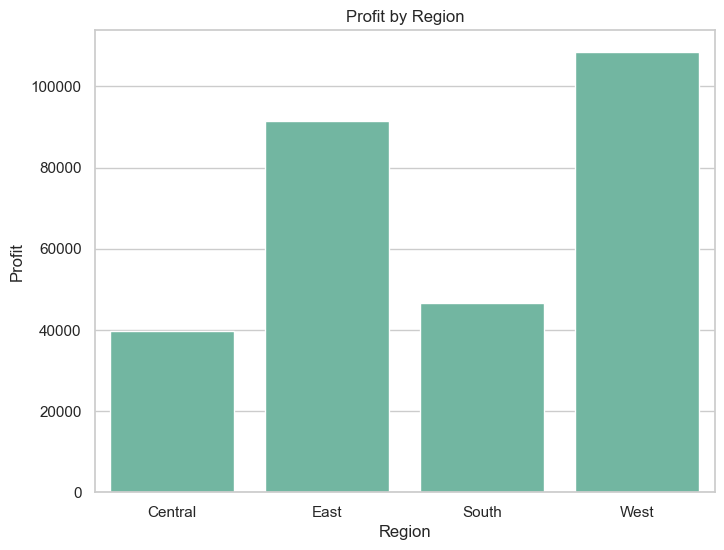

📊 Region Insights:
Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64
➡ The West region tends to be most profitable; Central often struggles.



In [6]:
# === 4. Regional Performance ===
region_profit = df.groupby("Region")["Profit"].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Profit by Region")
plt.ylabel("Profit")
plt.savefig("plots/profit_by_region.png")
plt.show()

print("📊 Region Insights:")
print(region_profit.sort_values(ascending=False))
print("➡ The West region tends to be most profitable; Central often struggles.\n")

In [8]:
# Convert Order Date to datetime if not already
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Create a Season column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["Season"] = df["Order Date"].dt.month.apply(get_season)


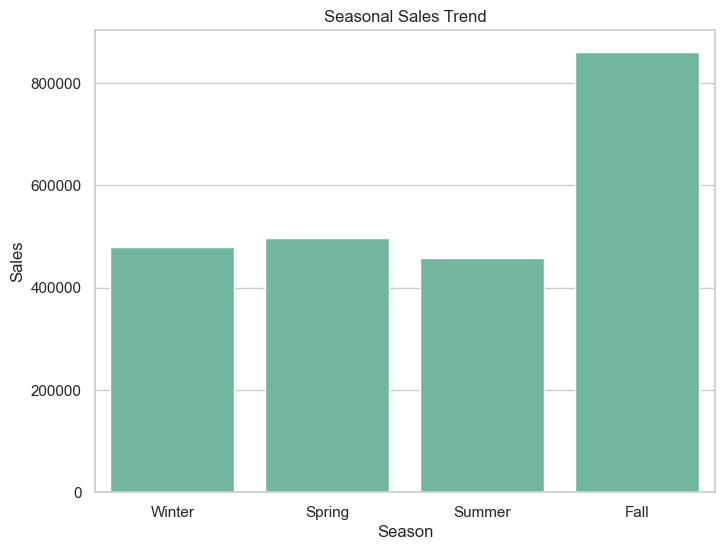

📊 Seasonal Insights:
Season
Fall      860434.0014
Spring    497796.4291
Summer    459000.8393
Winter    479969.5905
Name: Sales, dtype: float64
➡ Winter and Fall usually see spikes in sales (holiday effect).



In [9]:
# === 5. Seasonal Trends ===
season_sales = df.groupby("Season")["Sales"].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=season_sales.index, y=season_sales.values,
            order=["Winter","Spring","Summer","Fall"])
plt.title("Seasonal Sales Trend")
plt.ylabel("Sales")
plt.savefig("plots/seasonal_sales.png")
plt.show()

print("📊 Seasonal Insights:")
print(season_sales)
print("➡ Winter and Fall usually see spikes in sales (holiday effect).\n")

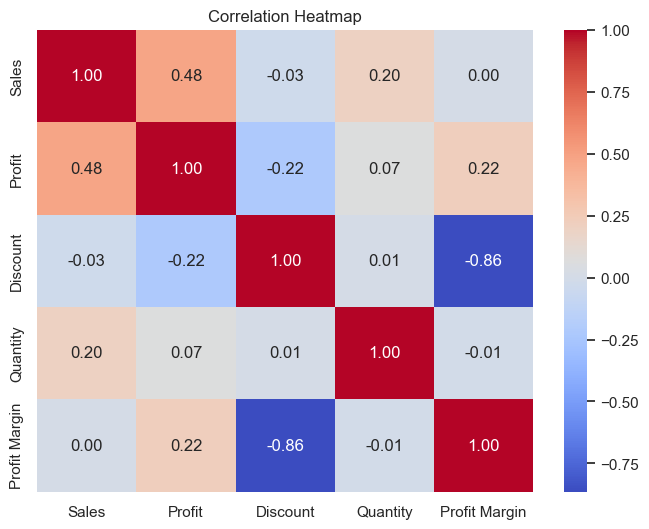

📊 Correlation Insights:
➡ Discount has strong negative correlation with Profit.



In [19]:
# === 6. Correlation Heatmap ===
plt.figure(figsize=(8,6))
sns.heatmap(df[["Sales","Profit","Discount","Quantity","Profit Margin"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png")
plt.show()

print("📊 Correlation Insights:")
print("➡ Discount has strong negative correlation with Profit.\n")

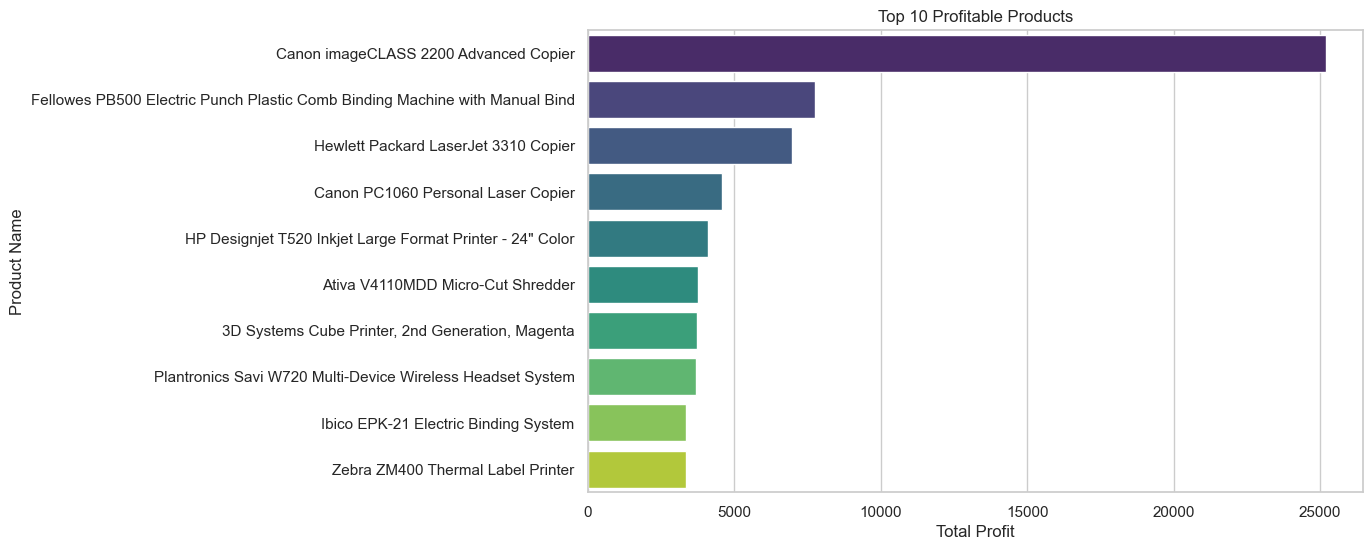

📊 Top Profitable Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64
➡ A few products contribute hea

In [20]:
# === 7. Top 10 Products by Profit ===
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Profitable Products")
plt.xlabel("Total Profit")
plt.savefig("plots/top10_profitable_products.png")
plt.show()

print("📊 Top Profitable Products:")
print(top_products)
print("➡ A few products contribute heavily to profit; good for focusing marketing.\n")

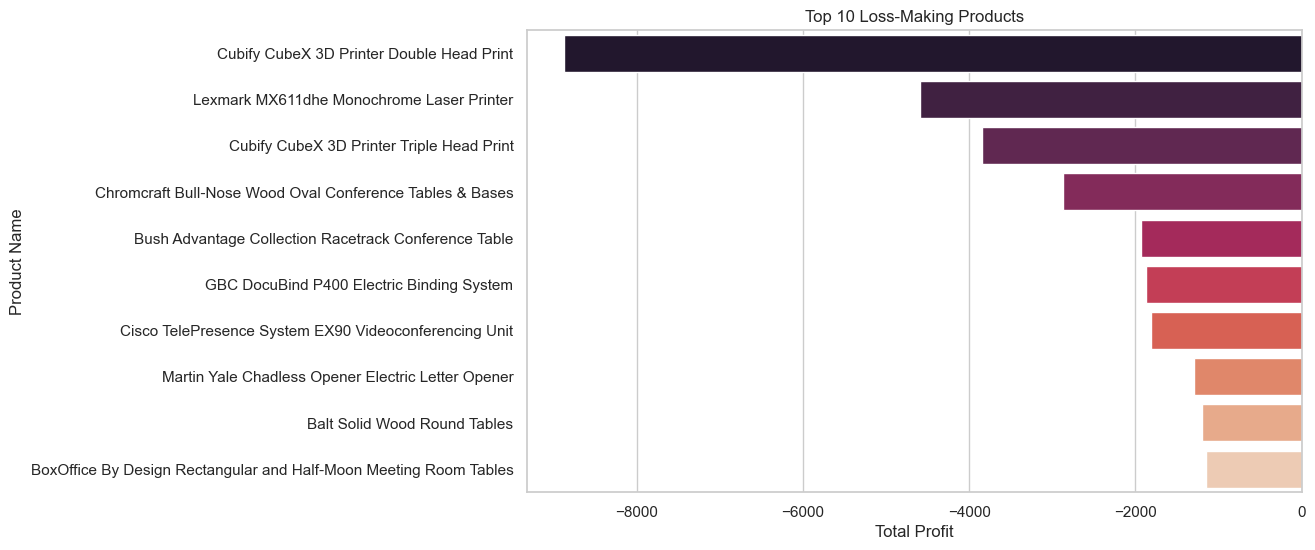

📊 Loss-Making Products:
Product Name
Cubify CubeX 3D Printer Double Head Print                           -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                           -4589.9730
Cubify CubeX 3D Printer Triple Head Print                           -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.1156
Bush Advantage Collection Racetrack Conference Table                -1934.3976
GBC DocuBind P400 Electric Binding System                           -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.0784
Martin Yale Chadless Opener Electric Letter Opener                  -1299.1836
Balt Solid Wood Round Tables                                        -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
Name: Profit, dtype: float64
➡ These products consistently generate losses; may require repricing or discontinuation.



In [21]:
# === 8. Loss-Making Products (Negative Profit) ===
loss_products = df.groupby("Product Name")["Profit"].sum().sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=loss_products.values, y=loss_products.index, hue=loss_products.index, palette="rocket", dodge=False, legend=False)
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Total Profit")
plt.savefig("plots/top10_loss_products.png")
plt.show()

print("📊 Loss-Making Products:")
print(loss_products)
print("➡ These products consistently generate losses; may require repricing or discontinuation.\n")